In [11]:
import random

from matplotlib import pyplot as plt

from Model.Inference import analyze_iou_across_images, get_summary
from Visualizer.Model import display_best_grid_prediction
from Model.zoo import UNetModel1024
from Visualizer.Grid import display_grid_from_path

from utils.data import iou_to_dataframe

In [7]:
model = UNetModel1024(weights="../../Model/zoo/weights/unet-1024-5050.weights.h5")
model = model.load_model()
output_dir = "../../CROPS"
image_idx = 10
mask_threshold = 0.5
grid_range = (4, 10)
random.seed(42)
index_range = [random.randint(0, 797) for _ in range(50)]

Grid size 4x4: IoU = 0.6735
Grid size 5x5: IoU = 0.6354
Grid size 6x6: IoU = 0.6104
Grid size 7x7: IoU = 0.4287
Grid size 8x8: IoU = 0.2429
Grid size 9x9: IoU = 0.1751
Grid size 10x10: IoU = 0.1179

Best grid size: 4x4 with IoU = 0.6735
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


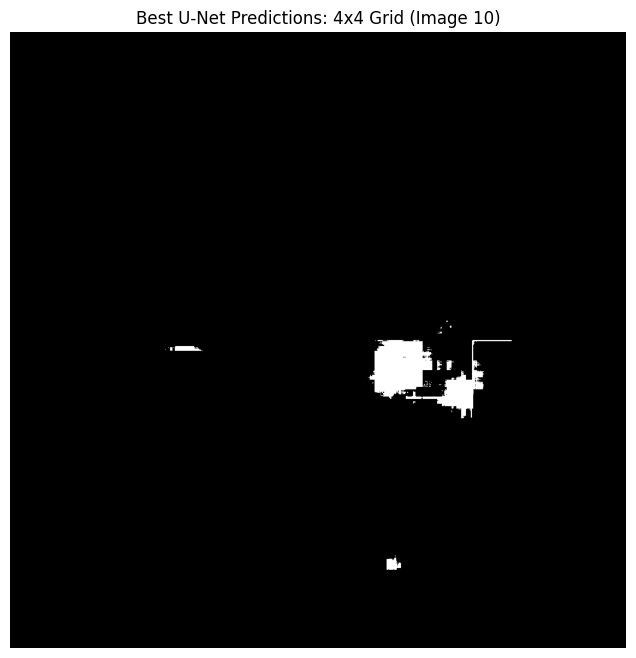

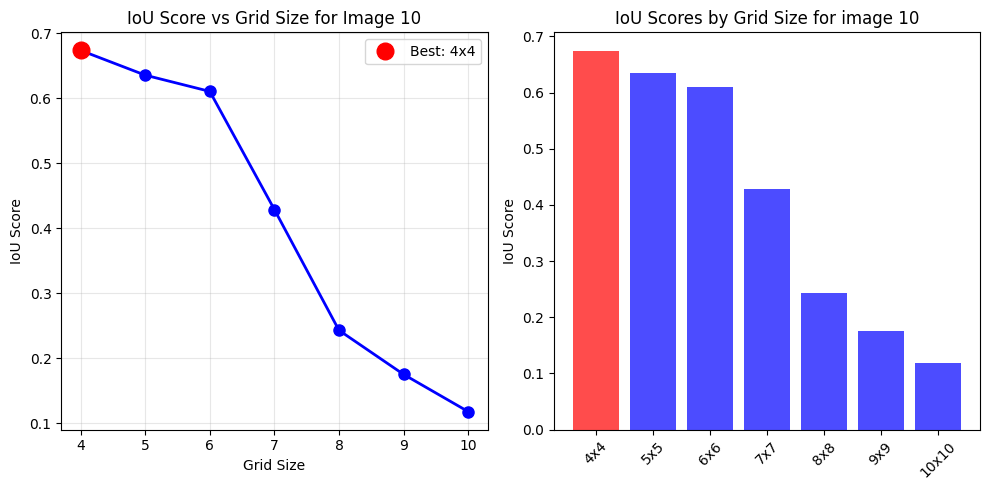

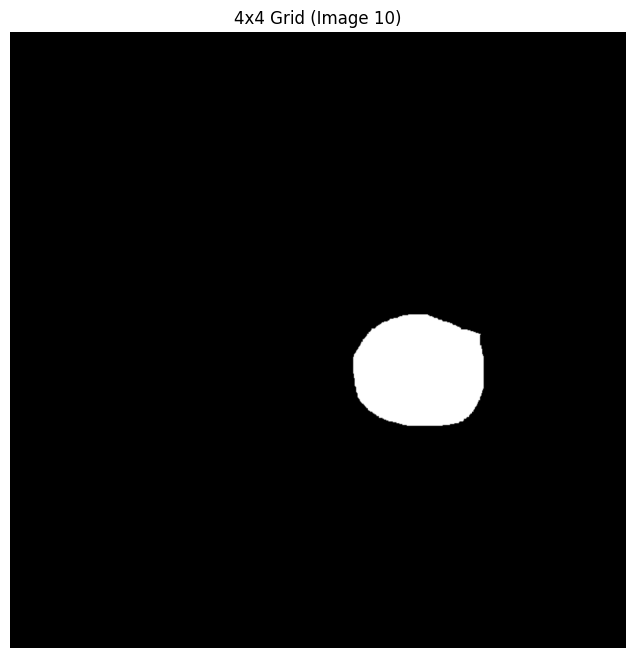

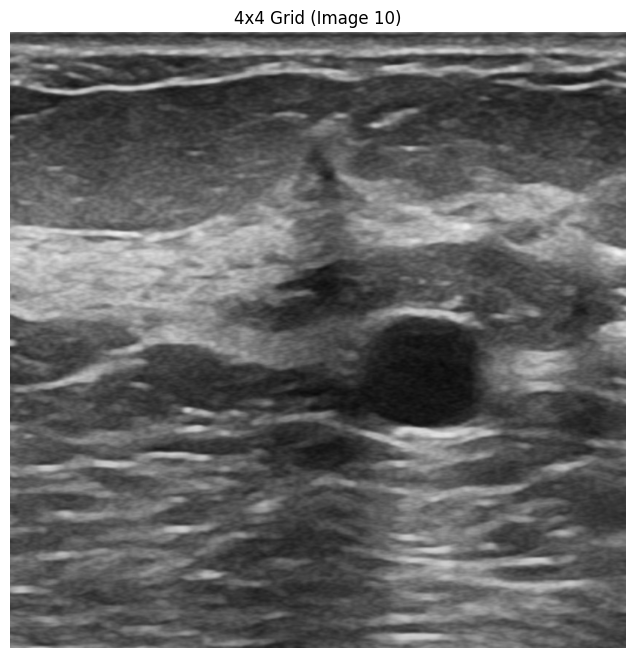

In [8]:

best_grid_size, iou_scores = display_best_grid_prediction(
    output_dir=output_dir,
    image_idx=image_idx,
    model=model,
    mask_threshold=mask_threshold,
    spacing=0,
    grid_range=grid_range
)

display_grid_from_path(output_dir, image_idx, best_grid_size, True, 0)
display_grid_from_path(output_dir, image_idx, best_grid_size, False, 0)

In [12]:
results = analyze_iou_across_images(
    output_dir=output_dir,
    model=model,
    mask_threshold=mask_threshold,
    grid_range=grid_range,
    index_range=index_range
)

Processing image 1/50... Grid size 4x4: IoU = 0.4344
Grid size 5x5: IoU = 0.4697
Grid size 6x6: IoU = 0.4764
Grid size 7x7: IoU = 0.4599
Grid size 8x8: IoU = 0.4049
Grid size 9x9: IoU = 0.4369
Grid size 10x10: IoU = 0.3596

Best grid size: 6x6 with IoU = 0.4764
✓ Best: 6x6 (IoU: 0.4764)
Processing image 2/50... Grid size 4x4: IoU = 0.3575
Grid size 5x5: IoU = 0.3598
Grid size 6x6: IoU = 0.2501
Grid size 7x7: IoU = 0.2271
Grid size 8x8: IoU = 0.1670
Grid size 9x9: IoU = 0.0287
Grid size 10x10: IoU = 0.0412

Best grid size: 5x5 with IoU = 0.3598
✓ Best: 5x5 (IoU: 0.3598)
Processing image 3/50... Grid size 4x4: IoU = 0.1065
Grid size 5x5: IoU = 0.2152
Grid size 6x6: IoU = 0.1189
Grid size 7x7: IoU = 0.0639
Grid size 8x8: IoU = 0.0467
Grid size 9x9: IoU = 0.0262
Grid size 10x10: IoU = 0.0216

Best grid size: 5x5 with IoU = 0.2152
✓ Best: 5x5 (IoU: 0.2152)
Processing image 4/50... Grid size 4x4: IoU = 0.4375
Grid size 5x5: IoU = 0.3600
Grid size 6x6: IoU = 0.3056
Grid size 7x7: IoU = 0.2857

In [13]:
df = iou_to_dataframe(results, index_range)
df

,image_idx,grid_size,iou_score,is_best,best_iou_for_image,best_grid_for_image
0,654,4,0.434438,False,0.476378,6
1,654,5,0.469698,False,0.476378,6
2,654,6,0.476378,True,0.476378,6
3,654,7,0.459933,False,0.476378,6
4,654,8,0.404902,False,0.476378,6
...,...,...,...,...,...,...
331,99,6,0.223015,False,0.537261,4
332,99,7,0.175107,False,0.537261,4
333,99,8,0.090438,False,0.537261,4
334,99,9,0.089926,False,0.537261,4


In [14]:
stats = get_summary(results)
stats

,grid_size,mean_iou,std_iou,min_iou,max_iou,median_iou
0,4,0.384213,0.152802,0.079366,0.713696,0.414154
1,5,0.338579,0.131310,0.040000,0.663163,0.326551
2,6,0.289238,0.121400,0.027778,0.550681,0.297629
3,7,0.219803,0.108953,0.061224,0.473859,0.209772
4,8,0.155581,0.084888,0.015625,0.404902,0.157918
5,9,0.117605,0.083596,0.000000,0.436913,0.110781
6,10,0.087175,0.072322,0.000000,0.359576,0.077975


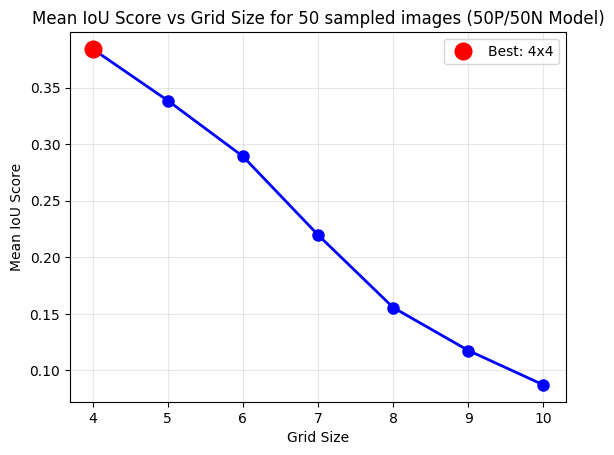

In [16]:
df_sorted = stats.sort_values('grid_size')
grid_sizes = df_sorted['grid_size'].tolist()
mean_ious = df_sorted['mean_iou'].tolist()

plt.plot(grid_sizes, mean_ious, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Grid Size')
plt.ylabel('Mean IoU Score')
plt.title(f'Mean IoU Score vs Grid Size for {len(index_range)} sampled images (50P/50N Model)')
plt.grid(True, alpha=0.3)
plt.xticks(grid_sizes)

# Highlight best grid size
best_idx = df_sorted['mean_iou'].idxmax()
best_grid_size = df_sorted.loc[best_idx, 'grid_size']
best_mean_iou = df_sorted.loc[best_idx, 'mean_iou']

plt.plot(best_grid_size, best_mean_iou, 'ro', markersize=12,
         label=f'Best: {best_grid_size}x{best_grid_size}')
plt.legend()
plt.show()